#VIA on scRNA-seq Human Hematopoiesis

In [1]:
#import pyVIA.core as via
import  Viav030 as via
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###Load the data and use the annotations derived from SingleR Novershtern reference data

In [2]:
# 5780 cells x 14651 genes Human Replicate 1. Male african american, 38 years
ad = sc.read( '/home/shobi/Trajectory/Datasets/HumanCD34/human_cd34_bm_rep1.h5ad')

# we use annotations given by SingleR which uses Novershtern Hematopoietic cell data as the reference. These are in line 
# with the annotations given by Setty et al., 2019 but offer a slightly more granular annotation.

nover_labels = pd.read_csv('/home/shobi/Trajectory/Datasets/HumanCD34/Nover_Cor_PredFine_notLogNorm.csv')['x'].values.tolist()
dict_abb = {'Basophils': 'BASO1', 'CD4+ Effector Memory': 'TCEL7', 'Colony Forming Unit-Granulocytes': 'GRAN1',
            'Colony Forming Unit-Megakaryocytic': 'MEGA1', 'Colony Forming Unit-Monocytes': 'MONO1',
            'Common myeloid progenitors': "CMP", 'Early B cells': "PRE_B2", 'Eosinophils': "EOS2",
            'Erythroid_CD34- CD71+ GlyA-': "ERY2", 'Erythroid_CD34- CD71+ GlyA+': "ERY3",
            'Erythroid_CD34+ CD71+ GlyA-': "ERY1", 'Erythroid_CD34- CD71lo GlyA+': 'ERY4',
            'Granulocyte/monocyte progenitors': "GMP", 'Hematopoietic stem cells_CD133+ CD34dim': "HSC1",
            'Hematopoietic stem cells_CD38- CD34+': "HSC2",
            'Mature B cells class able to switch': "B_a2", 'Mature B cells class switched': "B_a4",
            'Mature NK cells_CD56- CD16- CD3-': "Nka3", 'Monocytes': "MONO2",
            'Megakaryocyte/erythroid progenitors': "MEP", 'Myeloid Dendritic Cells': 'mDC (cDC)', 'Naïve B cells': "B_a1",
            'Plasmacytoid Dendritic Cells': "pDC", 'Pro B cells': 'PRE_B3'}
#NOTE: Myeloid DCs are now called Conventional Dendritic Cells cDCs 
nover_labels = [dict_abb[i] for i in nover_labels]
for i in list(set(nover_labels)):
    print('the population of ', i, 'is ', nover_labels.count(i))
tsnem = ad.obsm['tsne']
adata_counts = sc.AnnData(ad.X)  # ad.X is filtered, lognormalized,scaled// ad.raw.X is the filtered but not pre-processed
adata_counts.obs_names = ad.obs_names
adata_counts.var_names = ad.var_names
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=200)
true_label = nover_labels 

the population of  MEGA1 is  12
the population of  B_a2 is  1
the population of  ERY2 is  40
the population of  B_a1 is  27
the population of  mDC (cDC) is  96
the population of  GRAN1 is  3
the population of  PRE_B2 is  515
the population of  B_a4 is  8
the population of  BASO1 is  2
the population of  MONO1 is  186
the population of  EOS2 is  3
the population of  ERY3 is  104
the population of  CMP is  968
the population of  MEP is  339
the population of  GMP is  28
the population of  MONO2 is  35
the population of  HSC2 is  10
the population of  pDC is  204
the population of  ERY4 is  53
the population of  TCEL7 is  1
the population of  ERY1 is  773
the population of  HSC1 is  2365
the population of  PRE_B3 is  2
the population of  Nka3 is  5


### Run VIA (first iteration for coarse grained view)

input data has shape 5780 (samples) x 100 (features)


time is Mon Apr 12 14:41:13 2021
commencing global pruning
Share of edges kept after Global Pruning 45.79 %


number of components in the original full graph 1
for downstream visualization purposes we are also constructing a low knn-graph 


size neighbor array in low-KNN in pca-space for visualization (5780, 4)
commencing community detection


time is Mon Apr 12 14:41:17 2021
162  clusters before handling small/big
There are 0 clusters that are too big
humanCD34 : global cluster graph pruning level 0.15
number of components before pruning 1
number of connected componnents after reconnecting  1
percentage links trimmed from local pruning relative to start 0.0
percentage links trimmed from global pruning relative to start 63.2
there are  1 components in the graph
root user [4823]
start computing lazy-teleporting Expected Hitting Times


ended all multiprocesses, will retrieve and reshape
closeness  shortlist [2, 5, 6, 7, 9, 11, 16]
betweeness shortlist [2, 5, 6, 7, 9, 11, 12, 13, 14, 16]
out degree shortlist [2, 5, 6, 9, 11, 13, 14, 16]
TS 6 had 3 or more neighboring terminal states, namely [7, 9, 16]  and so we removed, 7
terminal clus in this component [5, 6, 9, 11, 13, 14, 16]
final terminal clus [5, 6, 9, 11, 13, 14, 16]


From root 2  to Terminal state 5 is found 57  times.


From root 2  to Terminal state 6 is found 106  times.


From root 2  to Terminal state 9 is found 109  times.


From root 2  to Terminal state 11 is found 226  times.


From root 2  to Terminal state 13 is found 383  times.


From root 2  to Terminal state 14 is found 379  times.


From root 2  to Terminal state 16 is found 36  times.
terminal clusters [5, 6, 9, 11, 13, 14, 16]
project onto single cell
start single cell projections of pseudotime and lineage likelihood


number of components before pruning 1
number of connected componnents after reconnecting  1
percentage links trimmed from local pruning relative to start 53.7
percentage links trimmed from global pruning relative to start 70.1


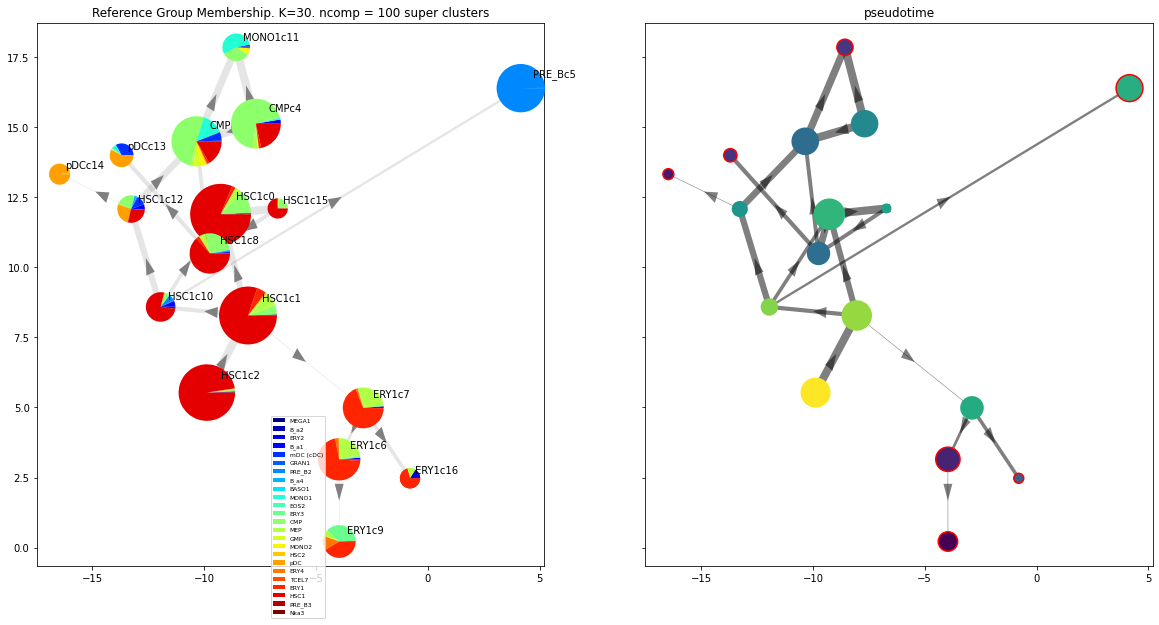

time elapsed 19.3 seconds


In [11]:
ncomps=100#80
knn=30
v0_random_seed=4
root_user = [4823]
v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
     too_big_factor=0.3,
     root_user=root_user, dataset='humanCD34', preserve_disconnected=True, random_seed=v0_random_seed,
     do_impute_bool=True, is_coarse=True,pseudotime_threshold_TS=20, neighboring_terminal_states_threshold=3) 
v0.run_VIA()
super_labels = v0.labels



### View the gene expression along the VIA graph. We use the computed HNSW small world graph in VIA to accelerate the gene imputation calculations (using similar approach to MAGIC) as follows:

start magic


shape of transition matrix raised to power 3 (5780, 5780)
shape of imputed gene matrix (5780, 11)
end magic (5780, 11)


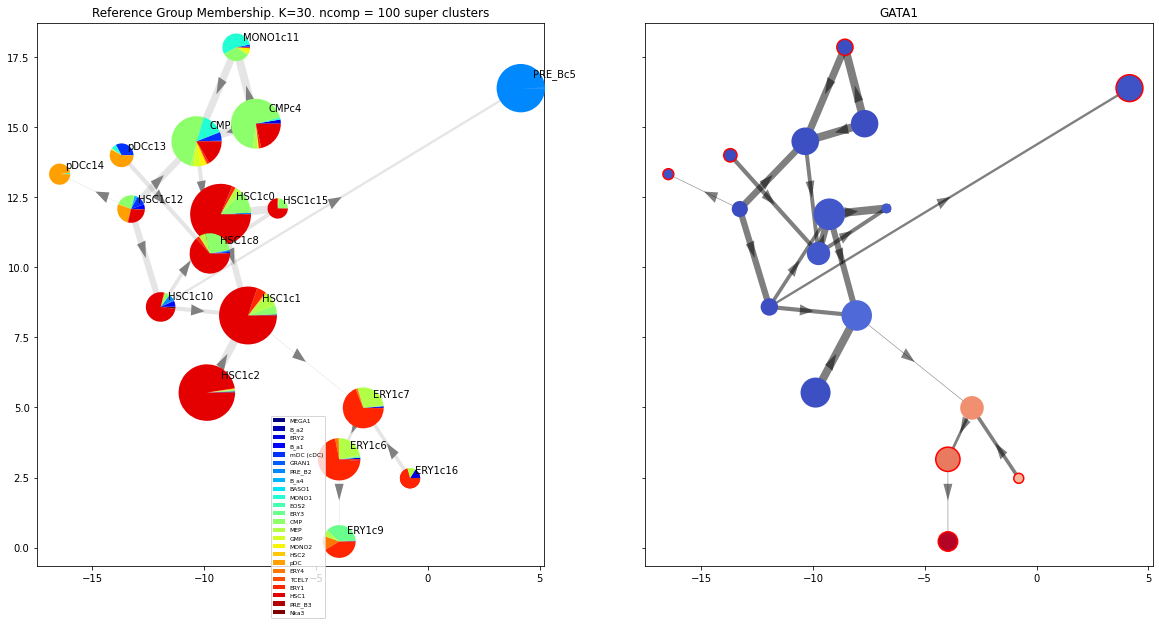

In [12]:
df_ = pd.DataFrame(ad.X)
df_.columns = [i for i in ad.var_names]
print('start magic')
gene_list_magic = ['IL3RA', 'IRF8', 'GATA1', 'GATA2', 'ITGA2B', 'MPO', 'CD79B', 'SPI1', 'CD34', 'CSF1R', 'ITGAX']
df_magic = v0.do_impute(df_, magic_steps=3, gene_list=gene_list_magic)
df_magic_cluster = df_magic.copy()
df_magic_cluster['parc'] = v0.labels
df_magic_cluster = df_magic_cluster.groupby('parc', as_index=True).mean()
print('end magic', df_magic.shape)
f, ((ax, ax1)) = plt.subplots(1, 2, sharey=True, figsize = [20,10])
v0.draw_piechart_graph(ax, ax1, type_pt='gene', gene_exp=df_magic_cluster['GATA1'].values, title='GATA1')

input data has shape 5780 (samples) x 100 (features)


time is Mon Apr 12 14:41:46 2021
commencing global pruning
Share of edges kept after Global Pruning 45.79 %
commencing community detection


time is Mon Apr 12 14:41:46 2021
162  clusters before handling small/big
There are 9 clusters that are too big
too big is True  cluster 0 will be Expanded


cluster 7 is too big with population 372 . It will be expanded


cluster 6 is too big with population 380 . It will be expanded


cluster 5 is too big with population 402 . It will be expanded


cluster 4 is too big with population 492 . It will be expanded


cluster 3 is too big with population 513 . It will be expanded


cluster 2 is too big with population 517 . It will be expanded


cluster 1 is too big with population 554 . It will be expanded


cluster 0 is too big with population 584 . It will be expanded


humanCD34 : global cluster graph pruning level 0.15
number of components before pruning 1
number of connected componnents after reconnecting  1
percentage links trimmed from local pruning relative to start 2.7
percentage links trimmed from global pruning relative to start 69.6
there are  1 components in the graph
root user [4823]
start computing lazy-teleporting Expected Hitting Times


ended all multiprocesses, will retrieve and reshape
super_terminal_clusters [5, 6, 9, 11, 13, 14, 16]
no sub cluster has majority made of super-cluster  9
terminal clus in this component [29, 25, 0, 2, 4, 5, 7]
final terminal clus [29, 25, 0, 2, 4, 5, 7]


From root 42  to Terminal state 29 is found 23  times.


From root 42  to Terminal state 25 is found 103  times.


From root 42  to Terminal state 0 is found 116  times.


From root 42  to Terminal state 2 is found 358  times.


From root 42  to Terminal state 4 is found 32  times.


From root 42  to Terminal state 5 is found 12  times.


From root 42  to Terminal state 7 is found 37  times.
terminal clusters [29, 25, 0, 2, 4, 5, 7]
project onto single cell
start single cell projections of pseudotime and lineage likelihood


number of components before pruning 1
number of connected componnents after reconnecting  1
percentage links trimmed from local pruning relative to start 69.4
percentage links trimmed from global pruning relative to start 80.2


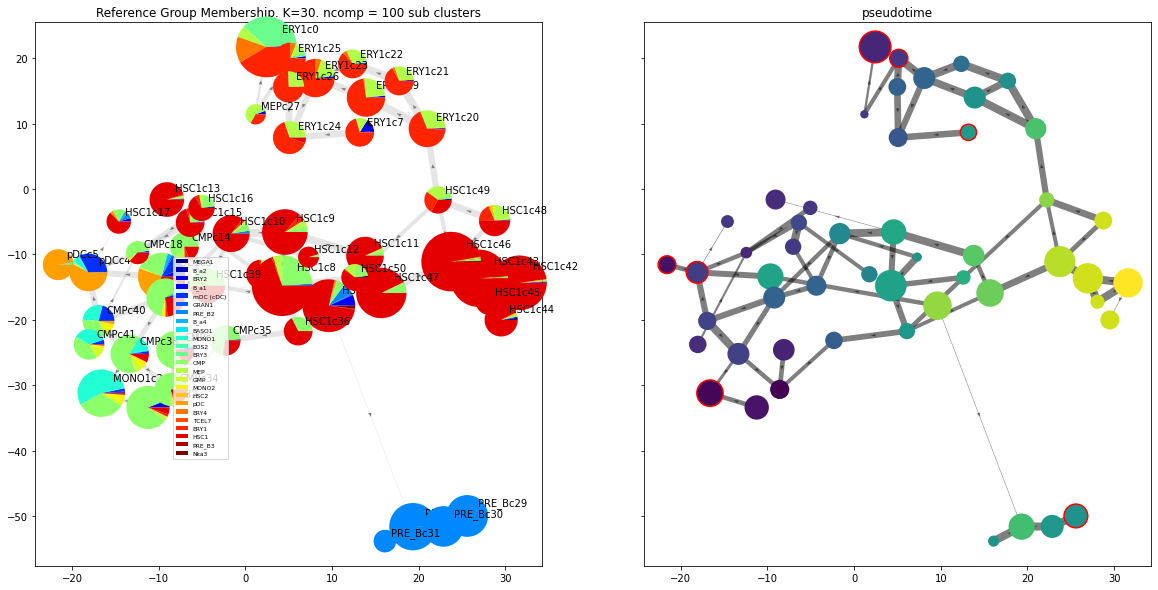

time elapsed 32.8 seconds


In [13]:
tsi_list = via.get_loc_terminal_states(v0, adata_counts.obsm['X_pca'][:, 0:ncomps])
v1 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
         too_big_factor=0.05, super_cluster_labels=super_labels, super_node_degree_list=v0.node_degree_list,
         super_terminal_cells=tsi_list, root_user=root_user,
         x_lazy=0.95, alpha_teleport=0.99, dataset='humanCD34', preserve_disconnected=True,
         super_terminal_clusters=v0.terminal_clusters, is_coarse=False, full_neighbor_array=v0.full_neighbor_array,
         ig_full_graph=v0.ig_full_graph, full_distance_array=v0.full_distance_array,
         csr_array_locally_pruned=v0.csr_array_locally_pruned,
         random_seed=v0_random_seed,pseudotime_threshold_TS=20, neighboring_terminal_states_threshold=3)  # *.4super_terminal_cells = tsi_list #3root=1,
v1.run_VIA()

### Visualization of VIA's overall and individual lineage trajectories. We show below how to plot VIA's results onto a downsampled-embedding. This is useful when computing an embedding such as t-SNE or PHATE would be very slow. The downsampling prior to visualization does not impact the results computed by VIA, which were done on the full sample space. 

dict of terminal state pairs, Super: sub:  {5: 29, 6: 25, 9: 0, 11: 2, 13: 4, 14: 5, 16: 7}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 5 is a super terminal with sub_terminal cluster 29
super cluster 6 is a super terminal with sub_terminal cluster 25
super cluster 9 is a super terminal with sub_terminal cluster 0
super cluster 11 is a super terminal with sub_terminal cluster 2
super cluster 13 is a super terminal with sub_terminal cluster 4
super cluster 14 is a super terminal with sub_terminal cluster 5
super cluster 16 is a super terminal with sub_terminal cluster 7


Cluster-path terminal state:  29 [42, 42, 1, 1, 1, 30, 30, 29, 29]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  29 [42, 42, 44, 1, 1, 28, 28, 29, 29]
target number 29
Cluster-path terminal state:  25 [42, 42, 43, 43, 22, 22, 22, 25, 25, 26]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  25 [42, 42, 43, 43, 22, 22, 22, 25, 25, 26]
target number 25
Cluster-path terminal state:  0 [42, 42, 43, 43, 22, 22, 22, 0, 0, 0]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  0 [42, 42, 43, 43, 22, 22, 22, 0, 0, 0]
target number 0


Cluster-path terminal state:  2 [42, 42, 2, 2, 2]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  2 [42, 42, 2, 2, 2]
target number 2
Cluster-path terminal state:  4 [42, 42, 1, 1, 1, 3, 3, 4, 4, 4]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  4 [42, 42, 1, 1, 3, 3, 3, 4, 4, 4]
target number 4
Cluster-path terminal state:  5 [42, 42, 1, 1, 1, 3, 3, 5, 5, 5]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  5 [42, 42, 1, 1, 3, 3, 3, 5, 5, 5]
target number 5
Cluster-path terminal state:  7 [42, 42, 42, 48, 48, 7, 7, 7, 7]
Cluster-path in downsampled embedded space (if visualization is performed on downsampled input) terminal state:  7 [42, 42, 43, 48, 48, 7, 7, 7, 7]
target number 7


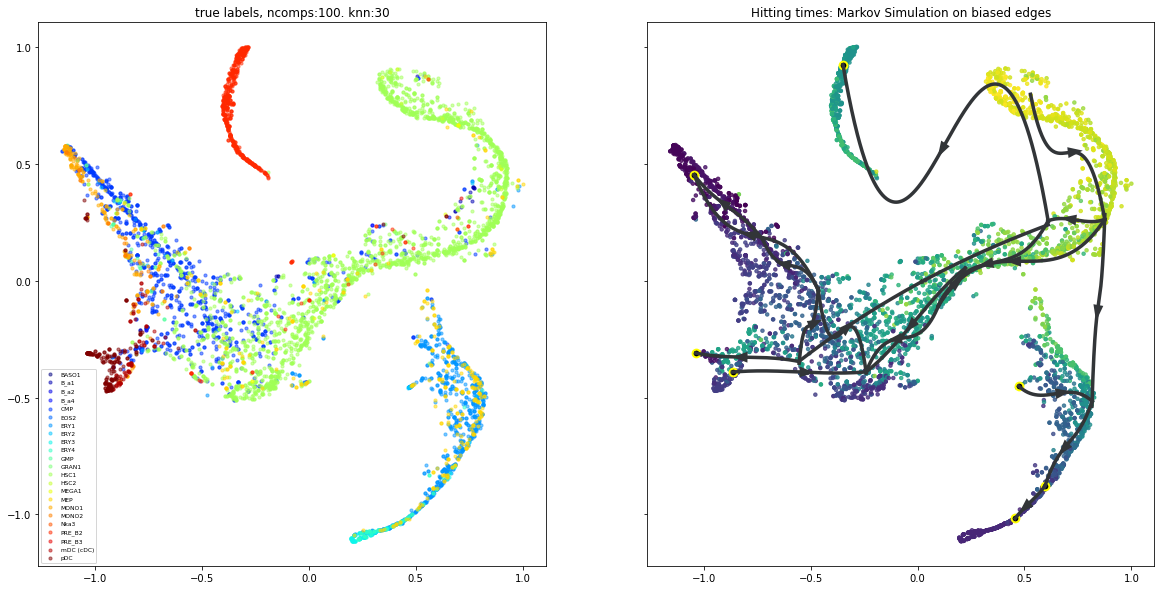

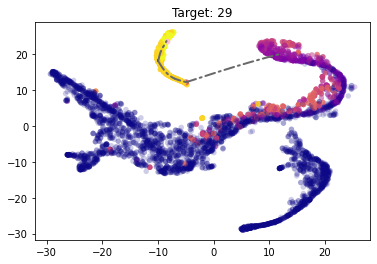

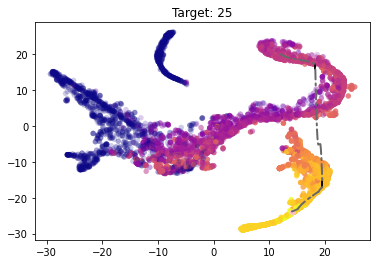

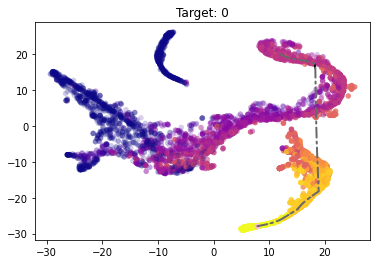

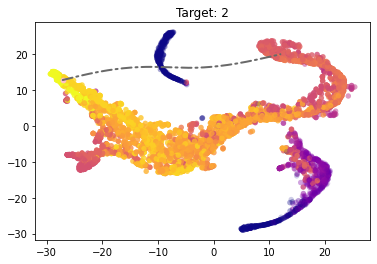

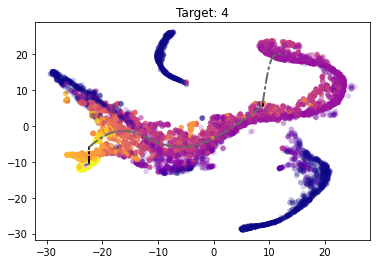

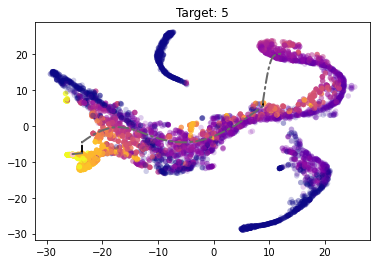

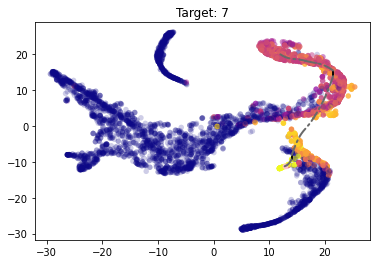

In [18]:
#suppose you had a very large dataset, then you can use this to subsample before visualization 
# if you don't need to downsample before computing an embedding (phate/tsne/umap), then just use  idx=np.arange(0, input_data.shape[0])
labels = v1.labels
 # by changing "size" to a number less than len(labels), you can choose to compute your embedding on just idx samples
idx = np.random.randint(len(labels), size=len(labels)) 

super_clus_ds_PCA_loc = via.sc_loc_ofsuperCluster_PCAspace(v0, v1, idx)
embedding = tsnem #in this case we already have an embedding of all the samples, but could have chosen to only compute an embedding for a subset idx

via.draw_trajectory_gams(embedding[idx], super_clus_ds_PCA_loc, cluster_labels = np.asarray(labels)[idx], super_cluster_labels=np.asarray(v0.labels)[idx], super_edgelist= v0.edgelist_maxout,
                     x_lazy=v1.x_lazy, alpha_teleport=v1.alpha_teleport, projected_sc_pt=np.asarray(v1.single_cell_pt_markov)[idx], true_label=np.asarray(true_label)[idx], knn=v0.knn,
                     final_super_terminal=v1.revised_super_terminal_clusters,
                     sub_terminal_clusters=v1.terminal_clusters,
                     title_str='Hitting times: Markov Simulation on biased edges', ncomp=ncomps, arrow_width_scale_factor=30)

# DRAW EVOLUTION PATHS
knn_hnsw = via.make_knn_embeddedspace(embedding[idx])
via.draw_sc_evolution_trajectory_dijkstra(v1, embedding[idx], knn_hnsw, v0.full_graph_shortpath, idx)
plt.show()

### We show the gene trends as a function of pseudotime for a selection of marker genes

gene name ITGA2B


gene name IL3RA


gene name IRF8


gene name MPO


gene name CSF1R


gene name GATA2


gene name CD79B


gene name CD34


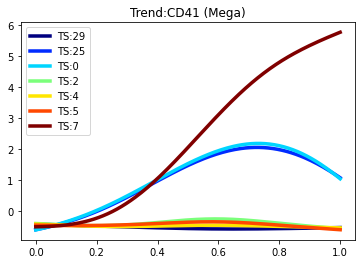

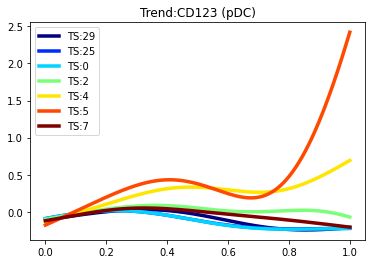

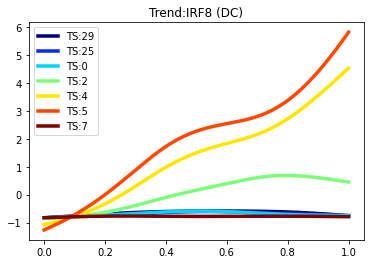

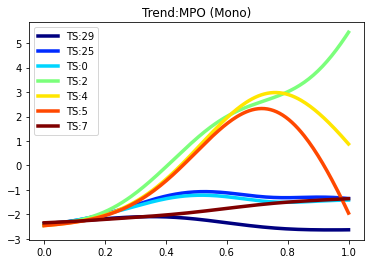

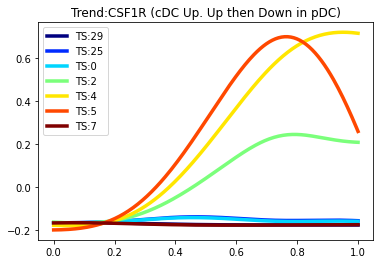

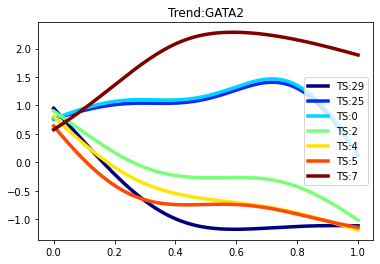

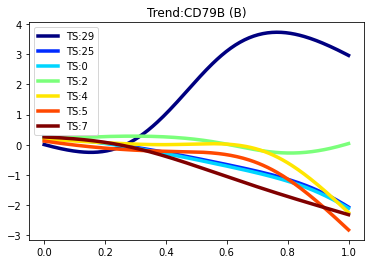

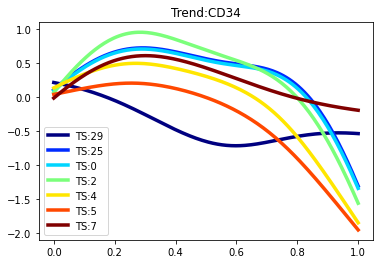

In [15]:
gene_name_dict = {'GATA1': 'GATA1', 'GATA2': 'GATA2', 'ITGA2B': 'CD41 (Mega)', 'MPO': 'MPO (Mono)',
                      'CD79B': 'CD79B (B)', 'IRF8': 'IRF8 (DC)', 'SPI1': 'PU.1', 'CD34': 'CD34',
                      'CSF1R': 'CSF1R (cDC Up. Up then Down in pDC)', 'IL3RA': 'CD123 (pDC)', 'IRF4': 'IRF4 (pDC)',
                      'ITGAX': 'ITGAX (cDCs)', 'CSF2RA': 'CSF2RA (cDC)'}
for gene_name in ['ITGA2B', 'IL3RA',      'IRF8',   'MPO', 'CSF1R', 'GATA2', 'CD79B',
                  'CD34']:  # ['GATA1', 'GATA2', 'ITGA2B', 'MPO', 'CD79B','IRF8','SPI1', 'CD34','CSF1R','IL3RA','IRF4', 'CSF2RA','ITGAX']:
    print('gene name', gene_name)
    # DC markers https://www.cell.com/pb-assets/products/nucleus/nucleus-phagocytes/rnd-systems-dendritic-cells-br.pdf


    loc_gata = np.where(np.asarray(ad.var_names) == gene_name)[0][0]
    subset_ = df_magic[gene_name].values

    # print('shapes of magic_ad 1 and 2', magic_ad.shape,subset_.shape)
    # v1.get_gene_expression(magic_ad,title_gene = gene_name_dict[gene_name])
    v1.get_gene_expression(subset_, title_gene=gene_name_dict[gene_name])